## 1. Importing Liabraries

In [ ]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Data Analytics
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Neural Networks
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import metrics
import itertools
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import sklearn
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---
---

# 2. Dataset Cleaning

## Importing Datasets

In [ ]:
import pandas as pd
import numpy as np

# Import Datasets
df1 = pd.read_csv("Dataset1.csv", header=None)
df2 = pd.read_csv("Dataset2.csv", header=None)

## Droping Rows with Duplicate or NaN Data

In [ ]:
# Drop Duplicates
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

# Drop NaN values
df1.dropna()
df2.dropna()

,0,1,2,3
1,8476.0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
2,10294.0,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,3608.0,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,10142.0,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,875.0,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6331,4490.0,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6332,8062.0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6333,8622.0,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6334,4021.0,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


## Selecting Title, Body and Label Columns

In [ ]:
# Select Columns 2,3,4 from both datasets and removing heading row
data1 = df1.values
data2 = df2.values

data1 = data1[1:, 1:]
data2 = data2[1:, 1:]

# Making Labels in data1 integral
data1[:,2] = data1[:,2].astype(int)

## Encode Dataset2 Labels

In [ ]:
# Encode FAKE as 1, REAL as 0
for row in data2:
  if row[2]=='FAKE':
    row[2] = 1
  else:
    row[2] = 0

## Separate Real News and Fake News Data

In [ ]:
real = []
fake = []

# Separate Dataset 1
for row in data1:
  if row[2] == 1:
    fake.append(row)
  else:
    real.append(row)

#Separate Dataset2
for row in data2:
  if row[2] == 1:
    fake.append(row)
  else:
    real.append(row)

## Separate Title and Body Data

In [ ]:
title_content = []
body_content = []

# Separate Title Data
for row in real:
  title_content.append([row[0], row[2]])
for row in fake:
  title_content.append([row[0], row[2]])

#Separate Body Data
for row in real:
  body_content.append([row[1], row[2]])
for row in fake:
  body_content.append([row[1], row[2]])

## Save Data

In [ ]:
np.savez("Title_data.npz", data=title_content)
np.savez("Body_data.npz", data=body_content)

---
---

# 3. Data Analytics

## Comparing Number Real and Fake News Data Points

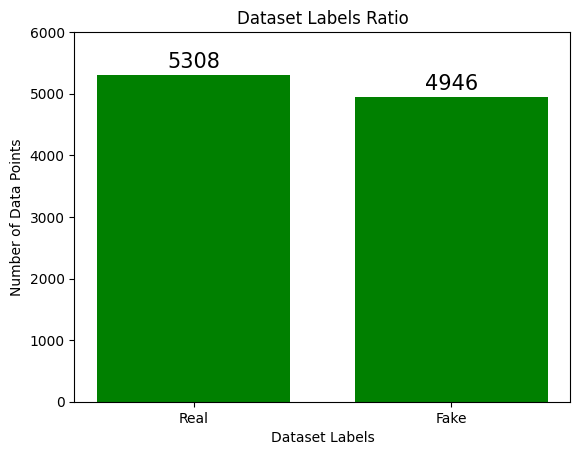

In [ ]:
x_labels = ['Real', 'Fake']
y_values = [len(real), len(fake)]

fig, ax = plt.subplots()

plt.bar(x_labels, y_values, align='center', width = 0.75, color='green')
plt.xlabel('Dataset Labels')
plt.ylabel('Number of Data Points')
plt.ylim((0, 6000))
plt.title('Dataset Labels Ratio')

for i, v in enumerate(x_labels):
    plt.text(i, y_values[i]+50, str(y_values[i]), ha='center', va='bottom', fontsize=15)

plt.show()

## Separating Words in Real and Fake Titles

In [ ]:
# Separating Real News
combined_real = []

for i in range(len(real)):
    sentence = re.sub('[^A-Za-z0-9 ]+', '', real[i][0])
    combined_real.append(sentence)

texts_real = []
for s in combined_real:
  s_split = s.split(' ')
  s_split = [word for word in s_split if word != '']
  texts_real.extend(s_split)

print("Number of Words in Real Titles : ", len(texts_real))


# Separating Fake News
combined_fake = []

for i in range(len(fake)):
    sentence = re.sub('[^A-Za-z0-9 ]+', '', fake[i][0])
    combined_fake.append(sentence)

texts_fake = []
for s in combined_fake:
  s_split = s.split(' ')
  s_split = [word for word in s_split if word != '']
  texts_fake.extend(s_split)

print("Number of Words in Fake Titles : ", len(texts_fake))

Number of Words in Real Titles :  52833
Number of Words in Fake Titles :  50884


## Removing Stop Words from Word Lists

In [ ]:
stop_words = set(stopwords.words('english'))

texts_real = [word for word in texts_real if word.lower() not in stop_words]
texts_fake = [word for word in texts_fake if word.lower() not in stop_words]

## Finding the Top 20 Words in Real Titles

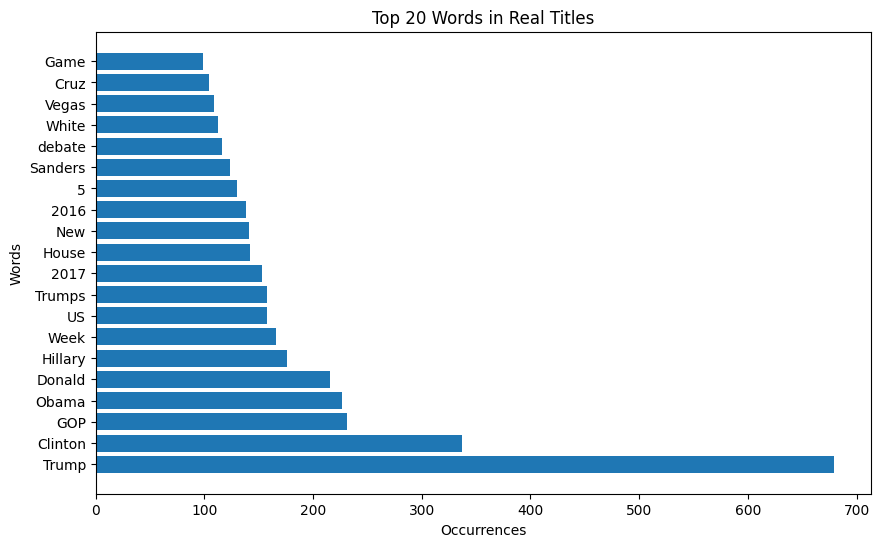

In [ ]:
word_counts = Counter(texts_real)

# Get the top 20 words
top_words = word_counts.most_common(20)

# Separate the words and their counts
words, counts = zip(*top_words)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(words, counts)      # Horizontal bar graph
plt.xlabel('Occurrences')   # Label for the x-axis
plt.ylabel('Words')         # Label for the y-axis
plt.title('Top 20 Words in Real Titles')  # Title for the graph

# Display the plot
plt.show()

## Finding Top 20 Words in Fake Titles

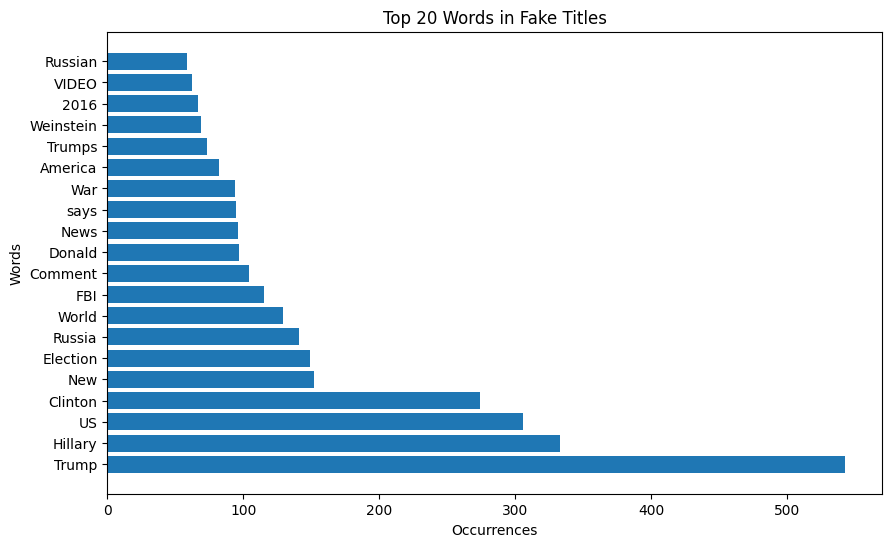

In [ ]:
word_counts = Counter(texts_fake)

# Get the top 20 words
top_words = word_counts.most_common(20)

# Separate the words and their counts
words, counts = zip(*top_words)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(words, counts)      # Horizontal bar graph
plt.xlabel('Occurrences')   # Label for the x-axis
plt.ylabel('Words')         # Label for the y-axis
plt.title('Top 20 Words in Fake Titles')  # Title for the graph

# Display the plot
plt.show()

# 4. Neural Network 1 - N-gram Vectorisation on Titles

## Loading Title Data

In [ ]:
data = np.load('Title_data.npz')
title_data = data['data']

output = [int(row[1]) for row in title_data]
output = np.array(output)

## Text Processing

Steps:
  1. Remove Special Characters using Regular Expression
  2. Tokenise the Text
  3. Word Lemmatisation

In [ ]:
lemmatizer = WordNetLemmatizer()

cleaned_title = []

for i in range(len(title_data)):
    title_sentence = re.sub('[^A-Za-z0-9 ]+', '', title_data[i][0])
    title_tokens = nltk.word_tokenize(title_sentence)
    title_lemmatized_word = [lemmatizer.lemmatize(word) for word in title_tokens]
    cleaned_title.append(" ".join(word.lower() for word in title_lemmatized_word))

cleaned_title = np.asarray(cleaned_title, dtype=object)

## Split Data into Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_title, output, test_size = 0.2, random_state = 1)

## Learn Vocabulary from Training Text and Vectorise Text

In [ ]:
max_vocab_title = 15000
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

tfidf_title = TfidfVectorizer(stop_words=stop_words,ngram_range=(1,3), max_features=max_vocab_title)

sparse_tfidf_train_title = tfidf_title.fit_transform(X_train)

X_tfidf_train_title = sparse_tfidf_train_title.toarray()

X_tfidf_train_title

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Creating Neural Network

In [ ]:
model_title = tf.keras.Sequential()
model_title.add(tf.keras.layers.Dense(64,input_shape=(max_vocab_title,),activation='relu'))
model_title.add(tf.keras.layers.Dropout(0.2))
model_title.add(tf.keras.layers.Dense(16,activation='relu'))
model_title.add(tf.keras.layers.Dropout(0.2))
model_title.add(tf.keras.layers.Dense(1,activation='relu'))
model_title.add(tf.keras.layers.Activation('sigmoid'))

model_title.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy', 'Recall', tf.keras.metrics.Precision()])

batch_size = 200
max_epochs = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model_title.fit(X_tfidf_train_title, y_train, batch_size = batch_size, epochs = max_epochs, callbacks=[early_stopping], validation_split = 0.2 , shuffle=True, verbose=1)

Epoch 1/10
33/33 [==============================] - 8s 129ms/step - loss: 0.6882 - accuracy: 0.5550 - recall: 0.9489 - precision_1: 0.5219 - val_loss: 0.6752 - val_accuracy: 0.6173 - val_recall: 0.9914 - val_precision_1: 0.5642
Epoch 2/10
33/33 [==============================] - 2s 59ms/step - loss: 0.6392 - accuracy: 0.6783 - recall: 0.9877 - precision_1: 0.6020 - val_loss: 0.6259 - val_accuracy: 0.6819 - val_recall: 0.9840 - val_precision_1: 0.6106
Epoch 3/10
33/33 [==============================] - 3s 79ms/step - loss: 0.5571 - accuracy: 0.7882 - recall: 0.9814 - precision_1: 0.7006 - val_loss: 0.5908 - val_accuracy: 0.7459 - val_recall: 0.9556 - val_precision_1: 0.6704
Epoch 4/10
33/33 [==============================] - 2s 72ms/step - loss: 0.4856 - accuracy: 0.8682 - recall: 0.9773 - precision_1: 0.7964 - val_loss: 0.5929 - val_accuracy: 0.7562 - val_recall: 0.9408 - val_precision_1: 0.6843
Epoch 5/10
33/33 [==============================] - 2s 52ms/step - loss: 0.4436 - accuracy:

## Vectorise Test Data

In [ ]:
sparse_tfidf_test_title = tfidf_title.transform(X_test)
X_tfidf_test_title = sparse_tfidf_test_title.toarray()

## Run Model on Test Set

In [ ]:
NN1_loss, NN1_accuracy, NN1_recall, NN1_precision = model_title.evaluate(X_tfidf_test_title, y_test)
NN1_F1 = (2 * NN1_precision * NN1_recall) / (NN1_precision + NN1_recall)

65/65 [==============================] - 1s 9ms/step - loss: 0.6171 - accuracy: 0.7689 - recall: 0.9085 - precision_1: 0.6937


## Evaluation Metrics

In [ ]:
print('Model Accuracy = %.2f' % (NN1_accuracy*100))
print('Model Recall = %.2f' % (NN1_recall*100))
print('Model Precision = %.2f' % (NN1_precision*100))
print('Model F1 Measure = %.2f' % (NN1_F1*100))

Model Accuracy = 76.89
Model Recall = 90.85
Model Precision = 69.37
Model F1 Measure = 78.67


## Create Confusion Matrix

65/65 [==============================] - 1s 10ms/step


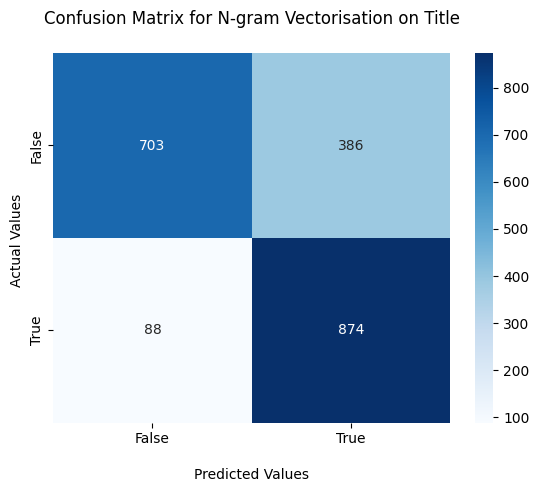

In [ ]:
y_pred = model_title.predict(X_tfidf_test_title)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(y_pred))

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")

ax.set_title('Confusion Matrix for N-gram Vectorisation on Title\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 5. Neural Network 2 - N-gram Vectorisation on Content

## Load Body Data

In [ ]:
data = np.load('Body_data.npz')
content_data = data['data']

output = [int(row[1]) for row in content_data]
output = np.array(output)

## Text Processing

Steps:
  1. Remove Special Characters using Regular Expression
  2. Tokenise the Text
  3. Word Lemmatisation

In [ ]:
lemmatizer = WordNetLemmatizer()

cleaned_content = []

for i in range(len(content_data)):
    content_sentence = re.sub('[^A-Za-z0-9 ]+', '', content_data[i][0])
    content_tokens = nltk.word_tokenize(content_sentence)
    content_lemmatized_word = [lemmatizer.lemmatize(word) for word in content_tokens]
    cleaned_content.append(" ".join(word.lower() for word in content_lemmatized_word))

cleaned_content = np.asarray(cleaned_content, dtype=object)

## Split into Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_content, output, test_size = 0.2, random_state = 1)

## Learn Vocabulary from Training Text and Vectorise Text

In [ ]:
max_vocab_content = 30000
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

tfidf_content = TfidfVectorizer(stop_words=stop_words,ngram_range=(1,3), max_features=max_vocab_content)

sparse_tfidf_train_content = tfidf_content.fit_transform(X_train)

X_tfidf_train_content = sparse_tfidf_train_content.toarray()

## Creating Neural Network

In [ ]:
model_content = tf.keras.Sequential()
model_content.add(tf.keras.layers.Dense(64,input_shape=(max_vocab_content,),activation='relu'))
model_content.add(tf.keras.layers.Dropout(0.2))
model_content.add(tf.keras.layers.Dense(16,activation='relu'))
model_content.add(tf.keras.layers.Dropout(0.2))
model_content.add(tf.keras.layers.Dense(1,activation='relu'))
model_content.add(tf.keras.layers.Activation('sigmoid'))

model_content.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy', 'Recall', tf.keras.metrics.Precision()])

batch_size = 200
max_epochs = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model_content.fit(X_tfidf_train_content, y_train, batch_size = batch_size, epochs = max_epochs, callbacks=[early_stopping], validation_split = 0.2 , shuffle=True, verbose=1)

Epoch 1/10
33/33 [==============================] - 5s 118ms/step - loss: 0.6648 - accuracy: 0.6800 - recall: 0.8440 - precision_2: 0.6253 - val_loss: 0.6081 - val_accuracy: 0.7837 - val_recall: 0.9889 - val_precision_2: 0.6986
Epoch 2/10
33/33 [==============================] - 3s 87ms/step - loss: 0.5417 - accuracy: 0.8502 - recall: 0.9937 - precision_2: 0.7660 - val_loss: 0.5078 - val_accuracy: 0.8629 - val_recall: 0.9852 - val_precision_2: 0.7895
Epoch 3/10
33/33 [==============================] - 3s 105ms/step - loss: 0.4487 - accuracy: 0.9281 - recall: 0.9943 - precision_2: 0.8742 - val_loss: 0.4708 - val_accuracy: 0.8873 - val_recall: 0.9864 - val_precision_2: 0.8214
Epoch 4/10
33/33 [==============================] - 3s 103ms/step - loss: 0.4034 - accuracy: 0.9621 - recall: 0.9962 - precision_2: 0.9303 - val_loss: 0.4698 - val_accuracy: 0.8867 - val_recall: 0.9852 - val_precision_2: 0.8212
Epoch 5/10
33/33 [==============================] - 3s 86ms/step - loss: 0.3858 - accurac

## Vectorise Test Data and Run Model

In [ ]:
sparse_tfidf_test_content = tfidf_content.transform(X_test)
X_tfidf_test_content = sparse_tfidf_test_content.toarray()

NN2_loss, NN2_accuracy, NN2_recall, NN2_precision = model_content.evaluate(X_tfidf_test_content, y_test)
NN2_F1 = (2 * NN2_precision * NN2_recall) / (NN2_precision + NN2_recall)

65/65 [==============================] - 1s 15ms/step - loss: 0.4842 - accuracy: 0.9142 - recall: 0.9605 - precision_2: 0.8701


## Evaluation Metrics

In [ ]:
print('Model Accuracy = %.2f' % (NN2_accuracy*100))
print('Model Recall = %.2f' % (NN2_recall*100))
print('Model Precision = %.2f' % (NN2_precision*100))
print('Model F1 Measure = %.2f' % (NN2_F1*100))

Model Accuracy = 91.42
Model Recall = 96.05
Model Precision = 87.01
Model F1 Measure = 91.30


## Create Confusion Matrix

65/65 [==============================] - 1s 9ms/step


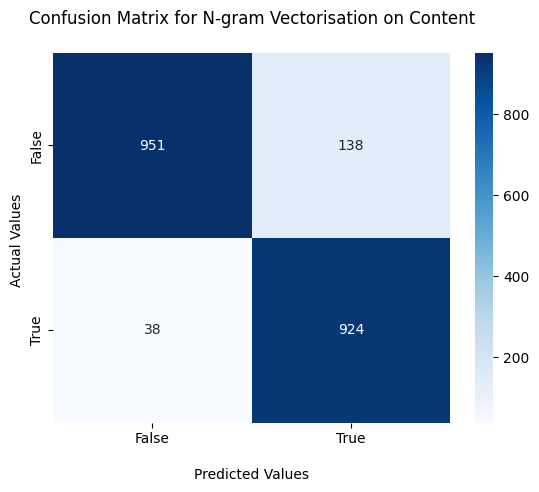

In [ ]:
y_pred = model_content.predict(X_tfidf_test_content)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(y_pred))

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")

ax.set_title('Confusion Matrix for N-gram Vectorisation on Content\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 6. Neural Network 3 - Sequnce Vectorisation on Title

## Loading Title Data

In [ ]:
data = np.load('Title_data.npz')
title_data = data['data']

output = [int(row[1]) for row in title_data]
output = np.array(output)

## Text Preprocessing

1. Remove Special Characters using Regular Expressions
2. Tokenize text
3. Word Normalization (Lemmatization)
4. Remove Stopwords

In [ ]:
stopword = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

cleaned_title = []

for i in range(len(title_data)):
    title_sentence = re.sub('[^A-Za-z0-9 ]+', '', title_data[i][0])
    title_tokens = nltk.word_tokenize(title_sentence)
    title_lemmatized_word = [lemmatizer.lemmatize(word) for word in title_tokens]
    title_removed_stopwords = [word for word in title_lemmatized_word if word not in stopword]
    cleaned_title.append(" ".join(word.lower() for word in title_removed_stopwords))

cleaned_title = np.asarray(cleaned_title,dtype=object)

## Split Train and Test Data

In [ ]:
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(cleaned_title, output, test_size = 0.2, random_state = 1)

## Feed Title to Keras Tokeniser

In [ ]:
max_vocab_title = 15000

tokenizer_title = Tokenizer(num_words = max_vocab_title)
tokenizer_title.fit_on_texts(X_train_title)

dictionary_title = tokenizer_title.word_index

## Convert Text to Word Sequence

In [ ]:
def convert_text_to_index_array_title(text):
    return [dictionary_title[word] for word in kpt.text_to_word_sequence(text)]

allWordIndices_title = []

for text_title in X_train_title:
    wordIndices_title = convert_text_to_index_array_title(text_title)
    allWordIndices_title.append(wordIndices_title)

## Cast Word Indices in Numpy Array

In [ ]:
allWordIndices_title = np.asarray(allWordIndices_title)

<ipython-input-52-394ac6a7f402>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allWordIndices_title = np.asarray(allWordIndices_title)


## Creating One-Hot Matrices from Word Indices

In [ ]:
train_title_x = tokenizer_title.sequences_to_matrix(allWordIndices_title, mode='binary')

## Making Output Categorical

In [ ]:
train_title_y = tf.keras.utils.to_categorical(y_train_title, 2)

## Training Neural Network

In [ ]:
model_title = tf.keras.Sequential()

model_title.add(tf.keras.layers.Dense(64, input_shape=(max_vocab_title,), activation = 'relu'))
model_title.add(tf.keras.layers.Dropout(0.2))
model_title.add(tf.keras.layers.Dense(16,activation='relu'))
model_title.add(tf.keras.layers.Dropout(0.2))
model_title.add(tf.keras.layers.Dense(2,activation='relu'))
model_title.add(tf.keras.layers.Activation('sigmoid'))

model_title.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Recall', tf.keras.metrics.Precision()])

batch_size = 500
max_epochs = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model_title.fit(train_title_x, train_title_y, batch_size = batch_size, epochs = max_epochs, callbacks=[early_stopping], validation_split = 0.2 , shuffle=True, verbose=1)

Epoch 1/10
14/14 [==============================] - 3s 149ms/step - loss: 0.6911 - accuracy: 0.5567 - recall: 0.6468 - precision_1: 0.5486 - val_loss: 0.6857 - val_accuracy: 0.6277 - val_recall: 0.9068 - val_precision_1: 0.5692
Epoch 2/10
14/14 [==============================] - 2s 134ms/step - loss: 0.6732 - accuracy: 0.7498 - recall: 0.9438 - precision_1: 0.6165 - val_loss: 0.6679 - val_accuracy: 0.7203 - val_recall: 0.9659 - val_precision_1: 0.5901
Epoch 3/10
14/14 [==============================] - 3s 183ms/step - loss: 0.6389 - accuracy: 0.8322 - recall: 0.9774 - precision_1: 0.6603 - val_loss: 0.6420 - val_accuracy: 0.7441 - val_recall: 0.9628 - val_precision_1: 0.6115
Epoch 4/10
14/14 [==============================] - 1s 95ms/step - loss: 0.5924 - accuracy: 0.8862 - recall: 0.9802 - precision_1: 0.7026 - val_loss: 0.6158 - val_accuracy: 0.7623 - val_recall: 0.9470 - val_precision_1: 0.6392
Epoch 5/10
14/14 [==============================] - 2s 174ms/step - loss: 0.5449 - accura

## Convert Test Data to same format as Training data

In [ ]:
# create another Tokenizer for model testing
tokenizer_test_title = Tokenizer(num_words = max_vocab_title)

# Register words in dictionary
def convert_text_to_index_array_title_test(text):
    words = kpt.text_to_word_sequence(text)
    wordIndices = []
    for word in words:
        if word in dictionary_title:
            wordIndices.append(dictionary_title[word])
    return wordIndices

allWordIndices_test_title = []

for text_test in X_test_title:
    wordIndices_test = convert_text_to_index_array_title_test(text_test)
    allWordIndices_test_title.append(wordIndices_test)

# create one-hot matrices out of the indexed train_title_input
test_title_x = tokenizer_test_title.sequences_to_matrix(allWordIndices_test_title, mode='binary')

# treat the labels as categories
test_title_y = tf.keras.utils.to_categorical(y_test_title, 2)
print(y_test_title)

[0 1 1 ... 0 0 0]


## Run Model on Test Set

In [ ]:
NN3_loss, NN3_accuracy, NN3_recall, NN3_precision = model_title.evaluate(test_title_x, test_title_y)
NN3_F1 = (2 * NN3_precision * NN3_recall) / (NN3_precision + NN3_recall)

65/65 [==============================] - 1s 10ms/step - loss: 0.5816 - accuracy: 0.7899 - recall: 0.9171 - precision_1: 0.7053


## Evaluation Metrics

In [ ]:
print('Model Accuracy = %.2f' % (NN3_accuracy*100))
print('Model Recall = %.2f' % (NN3_recall*100))
print('Model Precision = %.2f' % (NN3_precision*100))
print('Model F1 Measure = %.2f' % (NN3_F1*100))

Model Accuracy = 78.99
Model Recall = 91.71
Model Precision = 70.53
Model F1 Measure = 79.74


## Create Confusion Matrix

65/65 [==============================] - 1s 8ms/step


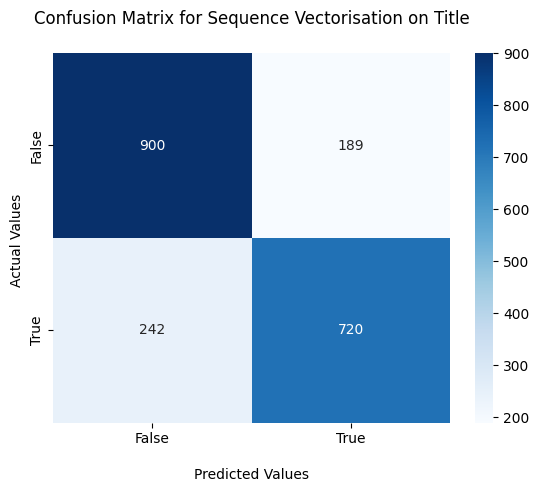

In [ ]:
y_pred = model_title.predict(test_title_x)
y_pred_new = []
for i in y_pred:
  if i[0]>i[1]:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test_title, np.rint(y_pred_new))

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")

ax.set_title('Confusion Matrix for Sequence Vectorisation on Title\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 7. Neural Network 4 - Sequence Vectorisation on Body

## Loading Body Data

In [ ]:
data = np.load('Body_data.npz')
content_data = data['data']

output = [int(row[1]) for row in content_data]
output = np.array(output)

## Text Preprocessing

1. Remove Special Characters using Regular Expressions
2. Tokenize text
3. Word Normalization (Lemmatization)
4. Remove Stopwords

In [ ]:
stopword = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

cleaned_content = []

for i in range(len(content_data)):
    content_sentence = re.sub('[^A-Za-z0-9 ]+', '', content_data[i][0])
    content_tokens = nltk.word_tokenize(content_sentence)
    content_lemmatized_word = [lemmatizer.lemmatize(word) for word in content_tokens]
    content_removed_stopwords = [word for word in content_lemmatized_word if word not in stopword]
    cleaned_content.append(" ".join(word.lower() for word in content_removed_stopwords))

cleaned_content = np.asarray(cleaned_content,dtype=object)

## Split Train Test Data

In [ ]:
X_train_content, X_test_content, y_train_content, y_test_content = train_test_split(cleaned_content, output, test_size = 0.2, random_state = 1)

## Feed Content to Keras Tokeniser

In [ ]:
max_vocab_content = 30000

tokenizer_content = Tokenizer(num_words = max_vocab_content)
tokenizer_content.fit_on_texts(X_train_content)

dictionary_content = tokenizer_content.word_index

## Convert Text to Word Sequence

In [ ]:
def convert_text_to_index_array_content(text):
    return [dictionary_content[word] for word in kpt.text_to_word_sequence(text)]

allWordIndices_content = []

for text_content in X_train_content:
    wordIndices_content = convert_text_to_index_array_content(text_content)
    allWordIndices_content.append(wordIndices_content)

## Store Word Indices into Numpy Array

In [ ]:
allWordIndices_content = np.asarray(allWordIndices_content, dtype="object")

## Create One Hot Matrices from Word Indices

In [ ]:
train_content_x = tokenizer_content.sequences_to_matrix(allWordIndices_content, mode='binary')

## Make Output Categorical

In [ ]:
train_content_y = tf.keras.utils.to_categorical(y_train_content, 2)

## Training the Neural Network

In [ ]:
model_content = tf.keras.Sequential()

model_content.add(tf.keras.layers.Dense(64, input_shape=(max_vocab_content,), activation = 'relu'))
model_content.add(tf.keras.layers.Dropout(0.2))
model_content.add(tf.keras.layers.Dense(16,activation='relu'))
model_content.add(tf.keras.layers.Dropout(0.2))
model_content.add(tf.keras.layers.Dense(2,activation='relu'))
model_content.add(tf.keras.layers.Activation('sigmoid'))

model_content.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Recall', tf.keras.metrics.Precision()])

batch_size = 500
max_epochs = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model_content.fit(train_content_x, train_content_y, batch_size = batch_size, epochs = max_epochs, callbacks=[early_stopping], validation_split = 0.2 , shuffle=True, verbose=1)

Epoch 1/10
14/14 [==============================] - 6s 292ms/step - loss: 0.6566 - accuracy: 0.6941 - recall: 0.8045 - precision: 0.6179 - val_loss: 0.5844 - val_accuracy: 0.8470 - val_recall: 0.8976 - val_precision: 0.7839
Epoch 2/10
14/14 [==============================] - 4s 279ms/step - loss: 0.5457 - accuracy: 0.8900 - recall: 0.9365 - precision: 0.7644 - val_loss: 0.5208 - val_accuracy: 0.8915 - val_recall: 0.9281 - val_precision: 0.8250
Epoch 3/10
14/14 [==============================] - 3s 185ms/step - loss: 0.4785 - accuracy: 0.9433 - recall: 0.9744 - precision: 0.8110 - val_loss: 0.4824 - val_accuracy: 0.9110 - val_recall: 0.9580 - val_precision: 0.8402
Epoch 4/10
14/14 [==============================] - 3s 184ms/step - loss: 0.4339 - accuracy: 0.9710 - recall: 0.9860 - precision: 0.8518 - val_loss: 0.4658 - val_accuracy: 0.9159 - val_recall: 0.9555 - val_precision: 0.8639
Epoch 5/10
14/14 [==============================] - 3s 184ms/step - loss: 0.4050 - accuracy: 0.9842 - re

## Convert Test Data to same Format as Training Data

In [ ]:
# create another Tokenizer for model testing
tokenizer_test_content = Tokenizer(num_words = max_vocab_content)

# this utility makes sure that all the words in your input
# are registered in the dictionary
# before trying to turn them into a matrix.
def convert_text_to_index_array_content_test(text):
    words = kpt.text_to_word_sequence(text)
    wordIndices = []
    for word in words:
        if word in dictionary_content:
            wordIndices.append(dictionary_content[word])
    return wordIndices

allWordIndices_test_content = []

for text_test in X_test_content:
    wordIndices_test = convert_text_to_index_array_content_test(text_test)
    allWordIndices_test_content.append(wordIndices_test)

# create one-hot matrices out of the indexed train_content_input
test_content_x = tokenizer_test_content.sequences_to_matrix(allWordIndices_test_content, mode='binary')

# treat the labels as categories
test_content_y = tf.keras.utils.to_categorical(y_test_content, 2)

## Run Model on Test Data

In [ ]:
NN4_loss, NN4_accuracy, NN4_recall, NN4_precision = model_content.evaluate(test_content_x, test_content_y)
NN4_F1 = (2 * NN4_precision * NN4_recall) / (NN4_precision + NN4_recall)

65/65 [==============================] - 1s 19ms/step - loss: 0.4681 - accuracy: 0.9230 - recall: 0.9517 - precision: 0.8865


## Evaluation Metrics

In [ ]:
print('Model Accuracy = %.2f' % (NN4_accuracy*100))
print('Model Recall = %.2f' % (NN4_recall*100))
print('Model Precision = %.2f' % (NN4_precision*100))
print('Model F1 Measure = %.2f' % (NN4_F1*100))

Model Accuracy = 92.30
Model Recall = 95.17
Model Precision = 88.65
Model F1 Measure = 91.79


## Create Confusion Matrix

65/65 [==============================] - 1s 10ms/step


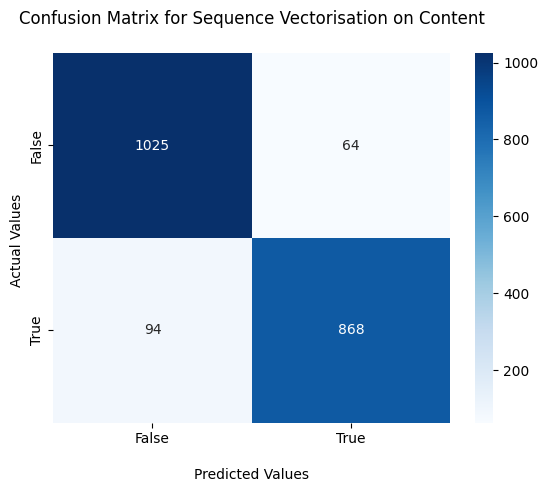

In [ ]:
y_pred = model_content.predict(test_content_x)
y_pred_new = []
for i in y_pred:
  if i[0]>i[1]:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test_content, np.rint(y_pred_new))

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")

ax.set_title('Confusion Matrix for Sequence Vectorisation on Content\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 8. Comparison

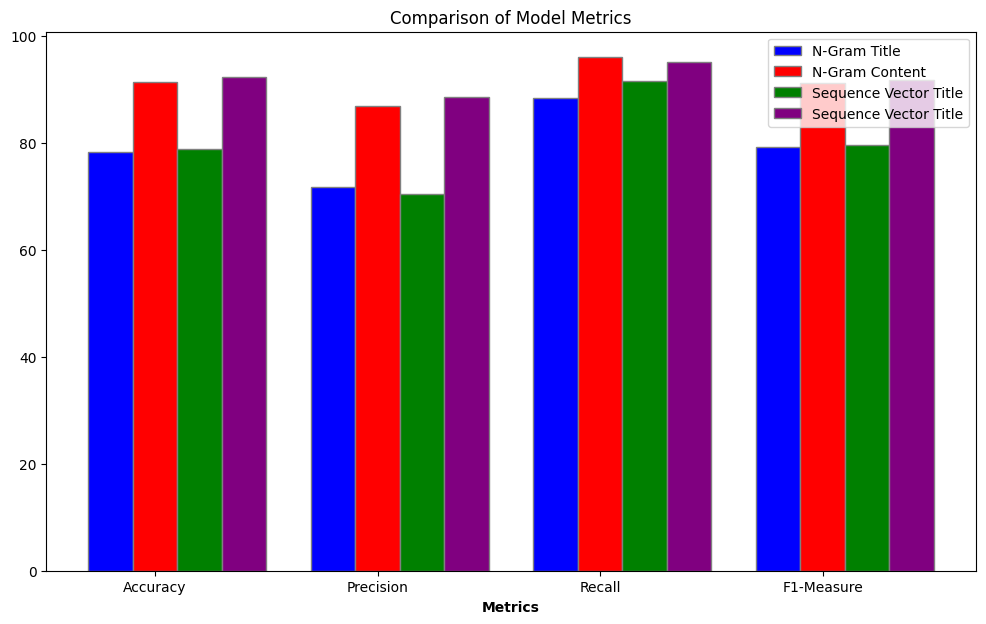

In [ ]:
# Labels for the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Measure']

# Values for each model
model1_values = [78.30, 71.81, 88.46, 79.27]
model2_values = [91.42, 87.01, 96.05, 91.3]
model3_values = [78.99, 70.53, 91.71, 79.74]
model4_values = [92.3, 88.65, 95.17, 91.79]

# Bar width
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(12, 7))

# Create the bar graph
plt.bar(r1, model1_values, color='b', width=bar_width, edgecolor='grey', label='N-Gram Title')
plt.bar(r2, model2_values, color='r', width=bar_width, edgecolor='grey', label='N-Gram Content')
plt.bar(r3, model3_values, color='g', width=bar_width, edgecolor='grey', label='Sequence Vector Title')
plt.bar(r4, model4_values, color='purple', width=bar_width, edgecolor='grey', label='Sequence Vector Title')

# Add labels and title
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)
plt.title('Comparison of Model Metrics')

# Add legend
plt.legend()

# Show the plot
plt.show()